In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression

data_dir = Path('./input/')
pollution = 'SO2'
station = 'DsJelGorOgin'

In [2]:
dtype = {
    'ID': 'uint64',
    'Stacja': 'category',
    'Wartosc': 'float32',
    'Rodzaj_zanieczyszczenia': 'category'
}
df = pd.read_csv(
    data_dir / 'data_collection.csv',
    dtype=dtype,
    index_col='Data',
    parse_dates=['Data']
)
no2 = df.loc[df['Rodzaj_zanieczyszczenia'] == pollution].drop('Rodzaj_zanieczyszczenia', axis=1).dropna()
no2['time'] = np.arange(len(no2.index))

df = no2.loc[no2['Stacja'] == station].drop('Stacja', axis=1).drop('ID', axis=1)

df.head()

,Wartosc,time
Data,,
2020-01-02,13.56370,0
2020-01-03,14.77630,1
2020-01-04,5.43823,2
2020-01-05,3.18594,3
2020-01-06,6.03675,4


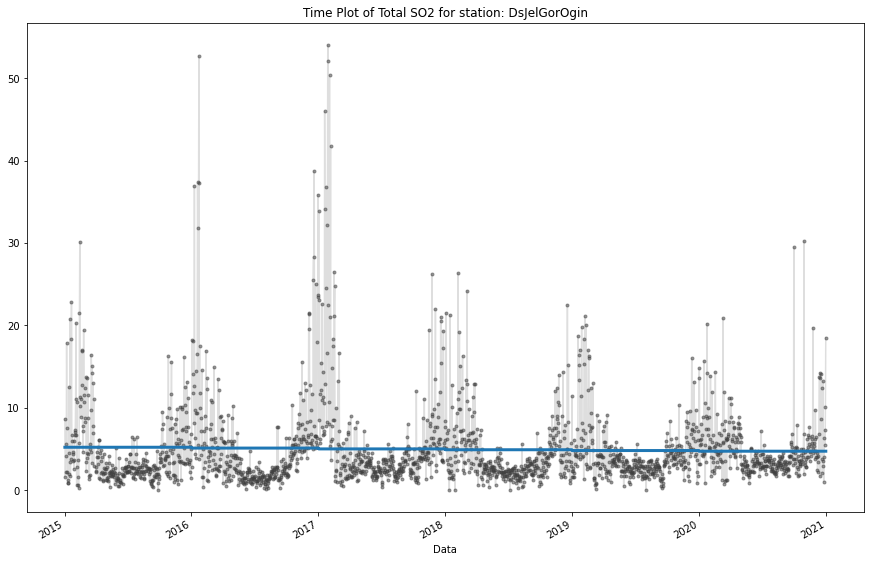

In [3]:
X = df.loc[:, ['time']]
y = df.loc[:, 'Wartosc']

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

plot_params = {'color': '0.75', 'style': '.-', 'markeredgecolor': '0.25', 'markerfacecolor': '0.25', 'legend': False}
ax = y.plot(**plot_params, alpha=0.5, figsize=(15, 10))
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title(f'Time Plot of Total {pollution} for station: {station}');